## Q1. Check unique state/UT names, fix state names appearing twice or more due to spelling mistakes

Example - 

Maharashtra

Maharashtra***

Here Maharashtra** should be replaced by Maharashtra

Example - 

Telangana                                   
Telangana***                               
Telengana                                   
Telengana*** 

Here Telangana**, Telengana, Telengana** should be replaced by telangana

Do the same for all states, 
Hint - Use replace() function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
covid_india = pd.read_csv("covid_19_india.csv")

In [3]:
covid_india["State/UnionTerritory"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Dadra and Nagar Haveli and Daman and Diu', 'Telangana',
       'Telangana***', 'Telengana***', 'Maharashtra***', 'Chandigarh***',
       'Punjab***'], dtype=object)

In [4]:
text = open("covid_19_india.csv", "r")
text = ''.join([i for i in text])

In [5]:
text = text.replace("Maharashtra***", "Maharashtra")  
text = text.replace("Chandigarh***", "Chandigarh")  
text = text.replace("Punjab***", "Punjab")  
text = text.replace("Telangana", "telangana")
text = text.replace("Telengana", "telangana")
text = text.replace("Telengana***", "telangana")
text = text.replace("Telangana***", "telangana")
text = text.replace("telangana***", "telangana")
text = text.replace("Dadar Nagar Haveli", "Dadra Nagar Haveli & Daman & Diu")
text = text.replace("Dadar and Nagar Haveli and Daman and Diu", "Dadra Nagar Haveli & Daman & Diu")
text = text.replace("Daman & Diu", "Dadra Nagar Haveli & Daman & Diu")
text = text.replace("Dadra and Nagar Haveli and Daman and Diu", "Dadra Nagar Haveli & Daman & Diu")
text = text.replace("Dadra Nagar Haveli & Dadra Nagar Haveli & Daman & Diu", "Dadra Nagar Haveli & Daman & Diu")

In [6]:
x = open("Covid_19_output.csv","w")
x.writelines(text) 
x.close()

In [7]:
covid_19 = pd.read_csv("Covid_19_output.csv")

In [8]:
covid_19

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
9286,9287,09/12/20,8:00 AM,telangana,-,-,266120,1480,275261
9287,9288,09/12/20,8:00 AM,Tripura,-,-,32169,373,32945
9288,9289,09/12/20,8:00 AM,Uttarakhand,-,-,72435,1307,79141
9289,9290,09/12/20,8:00 AM,Uttar Pradesh,-,-,528832,7967,558173


In [9]:
states_names = covid_19["State/UnionTerritory"].unique()

In [10]:
states_names  

array(['Kerala', 'telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra Nagar Haveli & Daman & Diu',
       'Cases being reassigned to states', 'Sikkim'], dtype=object)

## Q2. Calculate per day average confirmed cases for all states/UT.

In [11]:
avg_cases = covid_19.groupby(["Date","State/UnionTerritory"])["Confirmed"].mean()

In [12]:
avg_cases

Date      State/UnionTerritory       
01/02/20  Kerala                              2
01/03/20  Kerala                              3
01/04/20  Andaman and Nicobar Islands        10
          Andhra Pradesh                     83
          Assam                               1
                                          ...  
31/10/20  Tripura                         30717
          Uttar Pradesh                  480082
          Uttarakhand                     61915
          West Bengal                    369671
          telangana                      238632
Name: Confirmed, Length: 9290, dtype: int64

## Q3. Plot a linegraph that shows distribution of per day confirmed cases in Maharashtra in 2020.

In [13]:
confirmed_Mh = covid_19[covid_19["State/UnionTerritory"] == "Maharashtra"]

In [14]:
confirmed_Mh

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,09/03/20,6:00 PM,Maharashtra,2,0,0,0,2
91,92,10/03/20,6:00 PM,Maharashtra,5,0,0,0,5
97,98,11/03/20,6:00 PM,Maharashtra,2,0,0,0,2
120,121,12/03/20,6:00 PM,Maharashtra,11,0,0,0,11
133,134,13/03/20,6:00 PM,Maharashtra,14,0,0,0,14
...,...,...,...,...,...,...,...,...,...
9135,9136,05/12/20,8:00 AM,Maharashtra,-,-,1710050,47599,1842587
9170,9171,06/12/20,8:00 AM,Maharashtra,-,-,1715884,47694,1847509
9205,9206,07/12/20,8:00 AM,Maharashtra,-,-,1723370,47734,1852266
9240,9241,08/12/20,8:00 AM,Maharashtra,-,-,1730715,47774,1855341


<Figure size 720x432 with 0 Axes>

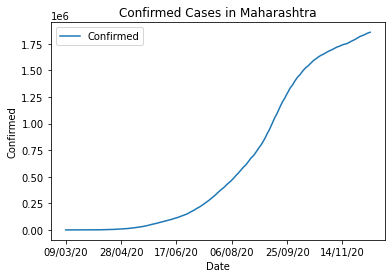

In [15]:
x = ["Date"]
y = ["Confirmed"]

plt.figure(figsize=(10,6))

confirmed_Mh.plot(x="Date",y="Confirmed")

plt.title("Confirmed Cases in Maharashtra")
plt.xlabel("Date")
plt.ylabel("Confirmed")

plt.show()

## Q4. Plot a pie-chart displaying percentage of total cured and total death cases in Maharashtra.

In [16]:
Maharashtra_cases = covid_19[covid_19["State/UnionTerritory"] == "Maharashtra"]

In [17]:
Cured = Maharashtra_cases["Cured"].sum()

In [18]:
Cured

147793712

In [19]:
Deaths = Maharashtra_cases["Deaths"].sum()

In [20]:
Deaths

5113730

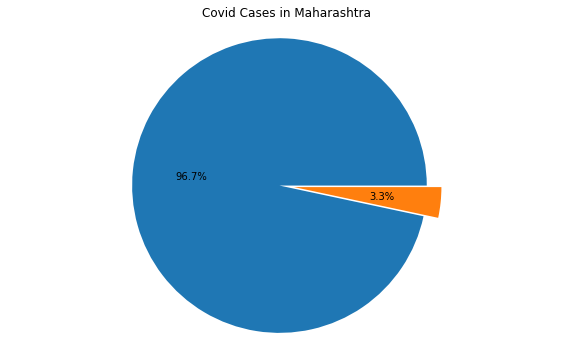

In [21]:
plt.figure(figsize=(10,6))
plt.title("Covid Cases in Maharashtra")
plt.pie(Maharashtra_cases[["Cured","Deaths"]].sum(),autopct='%1.1f%%',explode=(0,0.1))
plt.axis("equal")
plt.show()

## Q5. Plot a barplot showing top-5 states with maximum number of total confirmed cases.

In [22]:
top_cases = covid_19.groupby(["State/UnionTerritory"])["Confirmed"].sum()

In [23]:
top_cases

State/UnionTerritory
Andaman and Nicobar Islands            483761
Andhra Pradesh                       84815303
Arunachal Pradesh                     1314087
Assam                                21703581
Bihar                                23891385
Cases being reassigned to states       345565
Chandigarh                            1403514
Chhattisgarh                         16051609
Dadra Nagar Haveli & Daman & Diu       384806
Delhi                                46445978
Goa                                   4248741
Gujarat                              20788858
Haryana                              18060806
Himachal Pradesh                      2354421
Jammu and Kashmir                     9870504
Jharkhand                             9912089
Karnataka                            79354749
Kerala                               36407056
Ladakh                                 680539
Madhya Pradesh                       17544637
Maharashtra                         181173762
Manipur      

In [24]:
max_cases = top_cases.sort_values(ascending=False).head(5)

In [25]:
max_cases

State/UnionTerritory
Maharashtra       181173762
Andhra Pradesh     84815303
Tamil Nadu         82789540
Karnataka          79354749
Uttar Pradesh      50283822
Name: Confirmed, dtype: int64

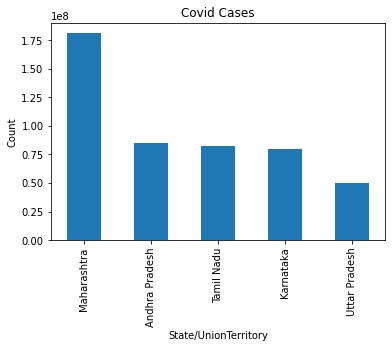

In [26]:
plt.figure()
max_cases.plot(kind="bar")
plt.title("Covid Cases")
plt.ylabel("Count")
plt.xlabel("State/UnionTerritory")
plt.show()

## Q6. Which 3 states have lowest total death cases ?

In [27]:
death_cases = covid_19.groupby("State/UnionTerritory")["Deaths"].sum()

In [28]:
death_cases.sort_values()

State/UnionTerritory
Unassigned                                0
Cases being reassigned to states          0
Mizoram                                 159
Dadra Nagar Haveli & Daman & Diu        296
Arunachal Pradesh                      3268
Nagaland                               3528
Sikkim                                 5998
Andaman and Nicobar Islands            6420
Meghalaya                              7403
Ladakh                                 7750
Manipur                               14435
Chandigarh                            20701
Himachal Pradesh                      32216
Tripura                               32265
Goa                                   55207
Puducherry                            57565
Assam                                 85655
Jharkhand                             87762
Uttarakhand                           90610
Bihar                                121993
Odisha                               127833
Kerala                               132008
Jammu and K

In [29]:
death_cases.sort_values().head(3)

State/UnionTerritory
Unassigned                            0
Cases being reassigned to states      0
Mizoram                             159
Name: Deaths, dtype: int64

## Q7. Plot multi linegraph that shows distribution of per day confirmed cases, death cases and cured cases in India in 2020.

In [30]:
x = covid_19["Date"]
y = covid_19["Confirmed"]
z = covid_19["Deaths"]
w = covid_19["Cured"]

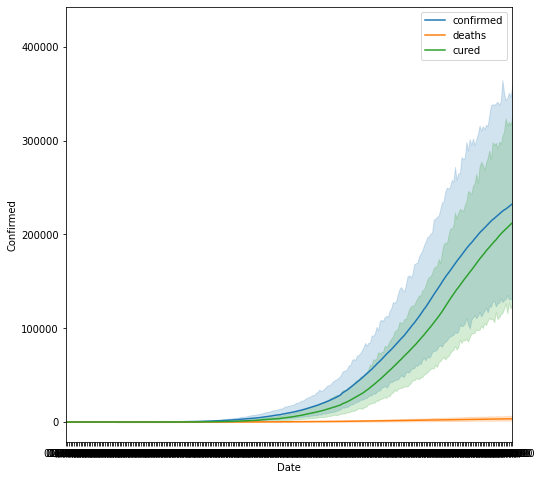

In [31]:
plt.figure(figsize=(8,8))

sns.lineplot(x,y,label="confirmed")
sns.lineplot(x,z,label="deaths")
sns.lineplot(x,w,label="cured")

plt.xlim((covid_19["Date"].min(),covid_19["Date"].max()))
plt.show()